<a href="https://colab.research.google.com/github/riya-29/60-DAYS-OF-AI-ML/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd # pandas help in reading of the data and management of data
import numpy as np #mathematical computation
import matplotlib.pyplot as plt #Used for Plotting of data
import seaborn as sns

df = pd.read_csv("Covid19.csv") #To read a csv file
df  #returns whole dataframe
df.head() #first five rows by default

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33


In [ ]:
df.shape   #shows no. of rows and columns(R x C)

(36, 8)

In [ ]:
df.values   #Only the values in the DataFrame will be returned, the axes labels will be removed
df.values[0:2]  #will return values after slicing 0-2

array([['Andaman and Nicobar', 7549, 1, 7419, 129, 0.01, 98.28, 1.71],
       ['Andhra Pradesh', 1995669, 16341, 1965657, 13671, 0.82, 98.5,
        0.69]], dtype=object)

In [ ]:
df.values[0:2,0:3]  #this returns values after slicing rows from 0-2 & columns 0-3

array([['Andaman and Nicobar', 7549, 1],
       ['Andhra Pradesh', 1995669, 16341]], dtype=object)

In [ ]:
df.tail(1)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
35,West Bengal,1539612,9736,1511558,18318,0.63,98.18,1.19


In [ ]:
df.columns    #returns all column names
df.columns[3]   #returns column name at given index

'Discharged'

In [ ]:
df.dtypes   #returns data type of columns 

State/UTs               object
Total Cases              int64
Active                   int64
Discharged               int64
Deaths                   int64
Active Ratio (%)       float64
Discharge Ratio (%)    float64
Death Ratio (%)        float64
dtype: object

In [ ]:
df.size #Return an int representing the number of elements in dataset(R*C i.e. here 36*8)

288

In [ ]:
df.drop_duplicates() #To delete duplicate items
df.values[0:2].size   #slice value of two rows & returns element of this dataset 

16

In [ ]:
df.count()  #The no. of rows present in that file

State/UTs              36
Total Cases            36
Active                 36
Discharged             36
Deaths                 36
Active Ratio (%)       36
Discharge Ratio (%)    36
Death Ratio (%)        36
dtype: int64

In [ ]:
# drop() --> Remove rows or columns by specifying label names and corresponding
# axis, or by specifying directly index or column names. When using a
# multi-index, labels on different levels can be removed by specifying
# the level.
df.drop(['Total Cases','Active','Discharged','Deaths'],axis=1).head()

,State/UTs,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,0.01,98.28,1.71
1,Andhra Pradesh,0.82,98.50,0.69
2,Arunachal Pradesh,3.41,96.10,0.49
3,Assam,1.51,97.54,0.95
4,Bihar,0.03,98.64,1.33


In [ ]:
df.info()   #prints basic info. about data including index dtype & columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [ ]:
df.describe()   #gives mathematical info about the data

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.968294e+05,10205.972222,8.746090e+05,12014.416667,1.682222,97.052222,1.265000
std,1.303563e+06,30660.005408,1.262310e+06,23205.834381,3.335660,3.239175,0.564464
min,7.549000e+03,1.000000,7.419000e+03,4.000000,0.010000,81.440000,0.040000
25%,6.981775e+04,213.750000,6.598125e+04,803.750000,0.067500,97.150000,0.947500
50%,4.645165e+05,1062.500000,4.546995e+05,5322.500000,0.570000,98.200000,1.320000
75%,9.980822e+05,7369.500000,9.826742e+05,13579.500000,1.337500,98.597500,1.607500
max,6.401213e+06,175695.000000,6.201168e+06,135255.000000,18.190000,99.920000,2.720000


In [ ]:
df.isnull().sum()   #To find any null value present

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

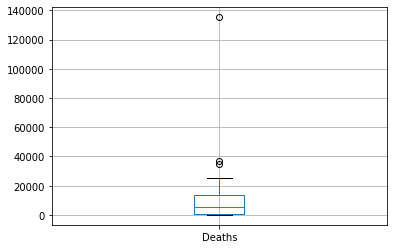

In [22]:
df.boxplot(['Deaths'])

In [ ]:
df = df.dropna() #Drop all the null values present
df.count()

State/UTs              36
Total Cases            36
Active                 36
Discharged             36
Deaths                 36
Active Ratio (%)       36
Discharge Ratio (%)    36
Death Ratio (%)        36
dtype: int64

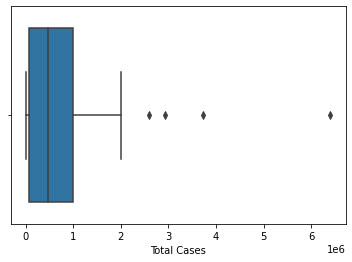

In [14]:
sns.boxplot(x=df['Total Cases'])   #Boxplot is used to find range in which data lies

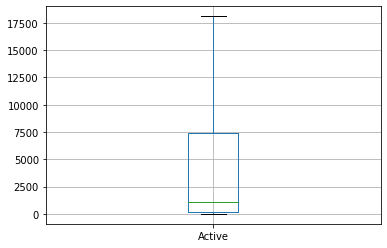

In [19]:
def remove_outlier(col): #To remove unecessary space that is not to be used
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range
lowage,upage=remove_outlier(df['Active'])
df['Active']=np.where(df['Active']>upage,upage,df['Active'])
df['Active']=np.where(df['Active']<lowage,lowage,df['Active'])
df.boxplot(column=["Active"])
plt.show()

In [23]:
df.corr() #To find the correlation

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
Total Cases,1.000000,0.764177,0.891333,0.680463,-0.196964,0.202781,-0.001039
Active,0.764177,1.000000,0.761149,0.564250,0.219442,-0.194301,-0.181277
Discharged,0.891333,0.761149,1.000000,0.908726,-0.121017,0.107895,0.094009
Deaths,0.680463,0.564250,0.908726,1.000000,-0.134799,0.087475,0.291043
Active Ratio (%),-0.196964,0.219442,-0.121017,-0.134799,1.000000,-0.985614,-0.252406
Discharge Ratio (%),0.202781,-0.194301,0.107895,0.087475,-0.985614,1.000000,0.085239
Death Ratio (%),-0.001039,-0.181277,0.094009,0.291043,-0.252406,0.085239,1.000000
